In [1]:
monitor = None
neuron = None

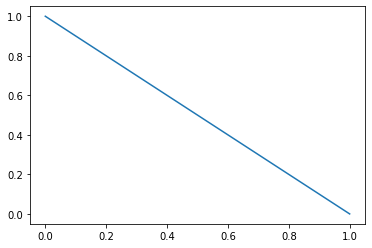

INFO       Cache size for target "cython": 1082 MB.
You can call "clear_cache('cython')" to delete all files from the cache or manually delete files in the "/home/russell/.cython/brian_extensions" directory. [brian2]


In [2]:
import matplotlib.pyplot as plt
plt.plot([0,1],[1,0])
plt.show()
import matplotlib.pyplot as plt
from brian2 import *
import brian2 as b2
from neo import AnalogSignal
import quantities as pq
import copy
num_neurons = 1
#duration = 2*second


# Parameters
area = 20000*umetre**2
Cm = 1*ufarad*cm**-2 * area
gl = 5e-5*siemens*cm**-2 * area
El = -54.387*mV
EK = -77.0*mV
ENa = 50.0*mV
g_na = 120*msiemens*cm**-2 * area
g_kd = 36*msiemens*cm**-2 * area
#VT = -54*mV
#VT = 0*mV#-54*mV
VT = -65.0*mV
# The model
eqs = Equations('''
dv/dt = (gl*(El-v) - g_na*(m*m*m)*h*(v-ENa) - g_kd*(n*n*n*n)*(v-EK) + I)/Cm : volt
dm/dt = 0.32*(mV**-1)*4*mV/exprel((13.*mV-v+VT)/(4*mV))/ms*(1-m)-0.28*(mV**-1)*5*mV/exprel((v-VT-40.*mV)/(5*mV))/ms*m : 1
dn/dt = 0.032*(mV**-1)*5*mV/exprel((15.*mV-v+VT)/(5*mV))/ms*(1.-n)-.5*exp((10.*mV-v+VT)/(40.*mV))/ms*n : 1
dh/dt = 0.128*exp((17.*mV-v+VT)/(18.*mV))/ms*(1.-h)-4./(1+exp((40.*mV-v+VT)/(5.*mV)))/ms*h : 1
I : amp
''')

#dmdt = self.alpha_m(V)*(1.0-m) - self.beta_m(V)*m
#dhdt = self.alpha_h(V)*(1.0-h) - self.beta_h(V)*h
#dndt = self.alpha_n(V)*(1.0-n) - self.beta_n(V)*n
# Threshold and refractoriness are only used for spike counting
neuron = NeuronGroup(1, eqs,method='exponential_euler',threshold='v > -40*mV',refractory='v > -40*mV')
                    #method='exponential_euler')
neuron.v = El
#neuron.I = '100*uA'# * i'# / num_neurons'

#monitor = SpikeMonitor(neuron)
#state_monitor = b2.StateMonitor(neuron, ["v"], record=True)
#state_dic = state_monitor.get_states()
#run(duration)


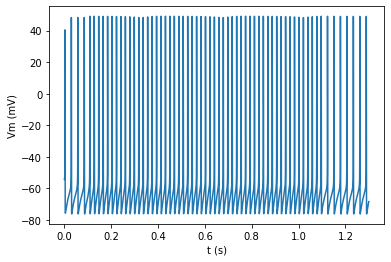

In [3]:
neuron.v = El
#neuron.I = '0.0183*nA'# * i'# / num_neurons'

#monitor = SpikeMonitor(neuron)
state_monitor = b2.StateMonitor(neuron, ["v"], record=True)
neuron.I = '0.0*nA'# * i'# / num_neurons'
dur0 = 0.1*second

run(dur0)
neuron.I = '81.29805*pA'# * i'# / num_neurons'
dur1 = 1.0*second
run(dur1)
dur2 = 0.2*second

neuron.I = '0.0*nA'# * i'# / num_neurons'
run(dur2)
state_dic = state_monitor.get_states()

from neo import AnalogSignal
import quantities as pq
vm_b = state_dic['v']
vm_b = [ float(i)*1000.0 for i in vm_b ]
#print(vm)

vm_b = AnalogSignal(vm_b,units = pq.mV,sampling_period = float(0.0001) * pq.s)
plt.plot(vm_b.times,vm_b.magnitude)
#plt.plot()

plt.xlabel('t (s)')
plt.ylabel('Vm (mV)')
plt.show()

In [4]:
import unittest
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
from neuronunit.optimisation.optimization_management import inject_and_plot_model, dtc_to_rheo
from neuronunit.optimisation.optimization_management import inject_and_plot_passive_model
import numpy as np
from neuronunit.optimisation.data_transport_container import DataTC
from neuronunit.optimisation import model_parameters
from elephant.spike_train_generation import threshold_detection
import quantities as pq


class testCrucialBackendsSucceed(unittest.TestCase):
    def setUp(self):
        model_parameters.MODEL_PARAMS.keys()
        #self.backends =  ["HH"]

        #raw_attrs = {k:np.mean(v) for k,v in model_parameters.MODEL_PARAMS[backend].items()}
        #self.backends = backends
        self.model_parameters = model_parameters
        
    def test_must_pass_0(self,vm_b=None,attrs_=None):
        fig, axs = plt.subplots(2,1,figsize=(40, 40))
        cnt=0
        b = str("HH")
        attrs = {k:np.mean(v) for k,v in self.model_parameters.MODEL_PARAMS[b].items()}
        if attrs_ is not None:
            for k,v in attrs_.items():
                attrs[k] = attrs_[k]
            
        pre_model = DataTC()
        if str("V_REST") in attrs.keys():
            attrs["V_REST"] = -75.0
        pre_model.attrs = attrs
        pre_model.backend = b
        vm,_ = inject_and_plot_model(pre_model.attrs,b)
        vm3 = [v/1000.0 for v in vm]
        print('suggesting should be in model','vm3 = [v/1000.0 for v in vm]')
        if vm_b is not None:
            axs[cnt].plot(vm_b.times,vm_b.magnitude)
        axs[cnt].plot(vm.times,vm3)
        axs[cnt].set_title(b)
        cnt+=1
        thresh = threshold_detection(vm,0.0*pq.mV)

        if len(thresh)>0 and vm is not None:
            boolean = True
        else:
            boolean = False
        self.assertTrue(boolean)
        vm,_ = inject_and_plot_passive_model(pre_model.attrs,b)
        axs[cnt].plot(vm.times,vm.magnitude)
        axs[cnt].set_title(b)
        cnt+=1

        if len(vm)>0 and vm is not None:
            boolean = True
        else:
            boolean = False
        self.assertTrue(boolean)
        return attrs

    #return True

consider installing pynn a heavier backend
pynn python Error
could not import brian2 neuronaldynamicsError


In [5]:
#a = testCrucialBackendsSucceed()
#a.setUp()
#a.test_must_pass_0(vm_b)

INFO:numba.transforms:finding looplift candidates


suggesting should be in model vm3 = [v/1000.0 for v in vm]


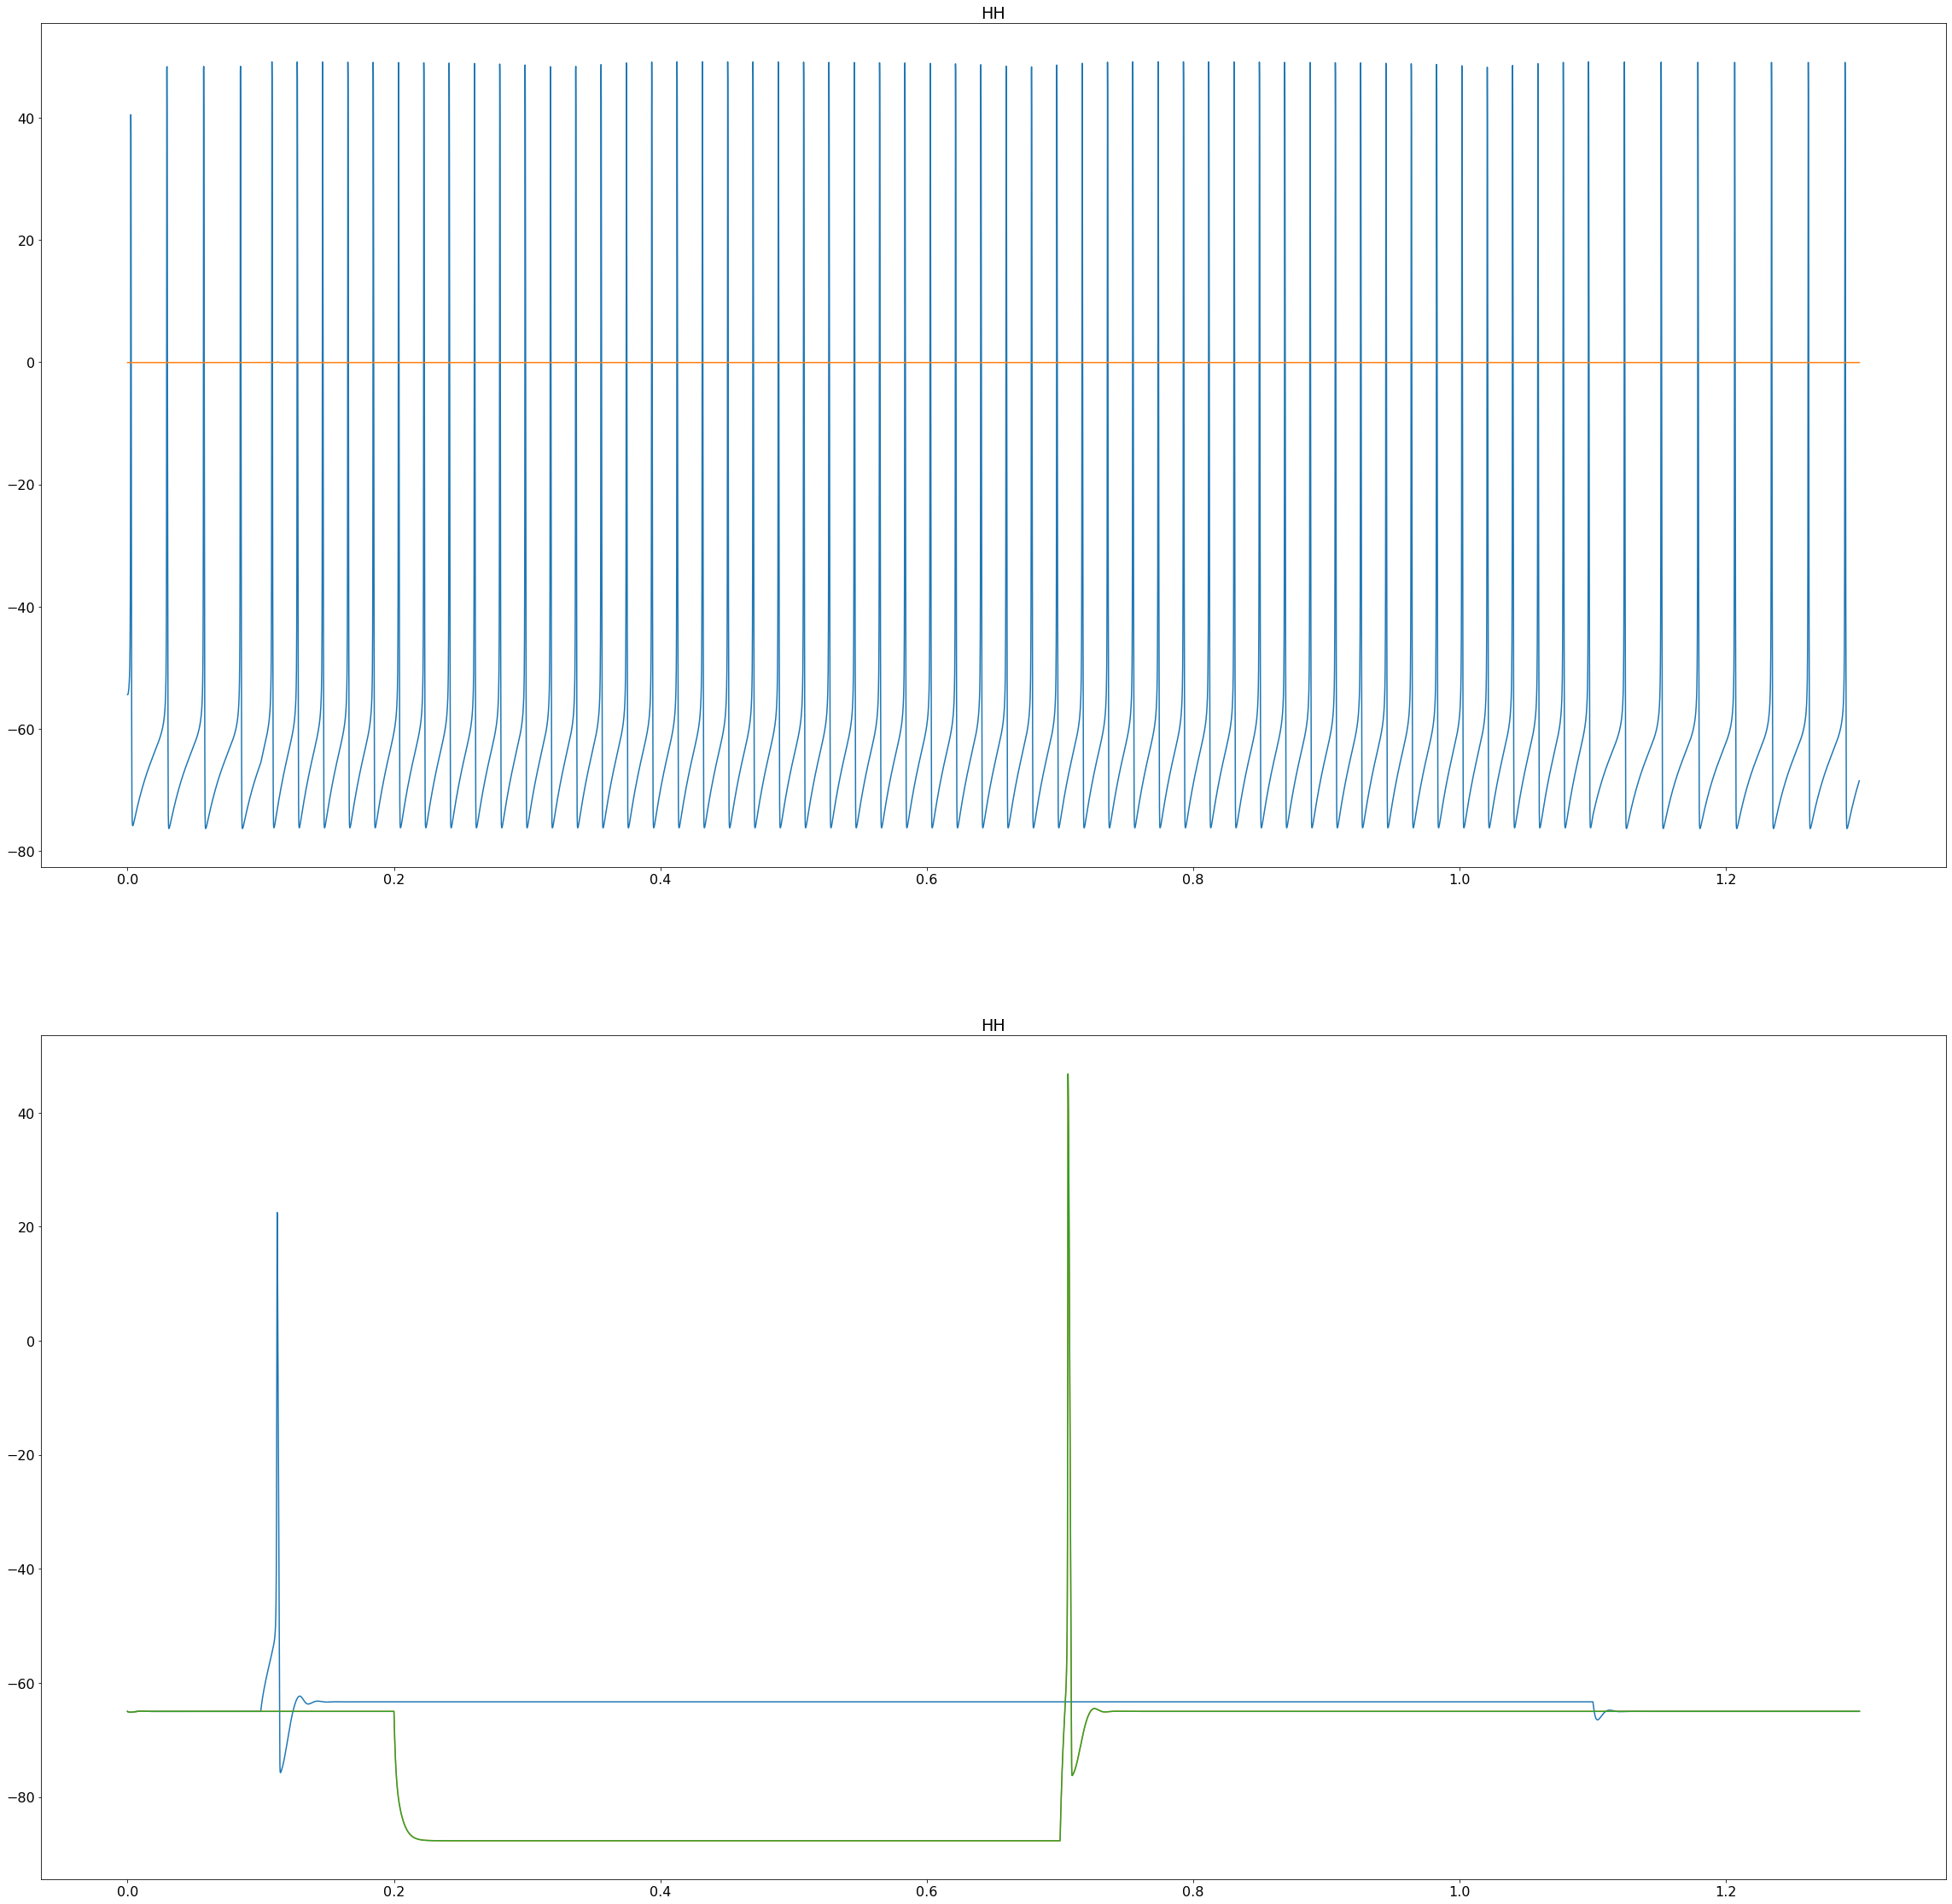

In [6]:
a = testCrucialBackendsSucceed()
a.setUp() 
attrs = a.test_must_pass_0(copy.copy(vm_b))

In [7]:

# Parameters
area = 20000*umetre**2
Cm = 1*ufarad*cm**-2 * area
gl = 5e-5*siemens*cm**-2 * area
El = -65*mV
EK = -90*mV
ENa = 50*mV
g_na = 100*msiemens*cm**-2 * area
g_kd = 30*msiemens*cm**-2 * area
VT = -63*mV


In [8]:

attrs

{'E_L': -54.387,
 'E_K': -77.0,
 'E_Na': 50.0,
 'g_L': 0.3,
 'g_K': 36.0,
 'g_Na': 120.0,
 'C_m': 1.0,
 'vr': -65.0,
 'Vr': -54.387}

In [9]:
C_m  =   1.0
"""membrane capacitance, in uF/cm^2"""

g_Na = 120.0
"""Sodium (Na) maximum conductances, in mS/cm^2"""

g_K  =  36.0
"""Postassium (K) maximum conductances, in mS/cm^2"""

g_L  =   0.3
"""Leak maximum conductances, in mS/cm^2"""

E_Na =  50.0
"""Sodium (Na) Nernst reversal potentials, in mV"""

E_K  = -77.0
"""Postassium (K) Nernst reversal potentials, in mV"""

E_L  = -54.387
"""Leak Nernst reversal potentials, in mV"""


'Leak Nernst reversal potentials, in mV'

In [10]:
new_attrs = {}

new_attrs['E_L'] = -54.387


suggesting should be in model vm3 = [v/1000.0 for v in vm]


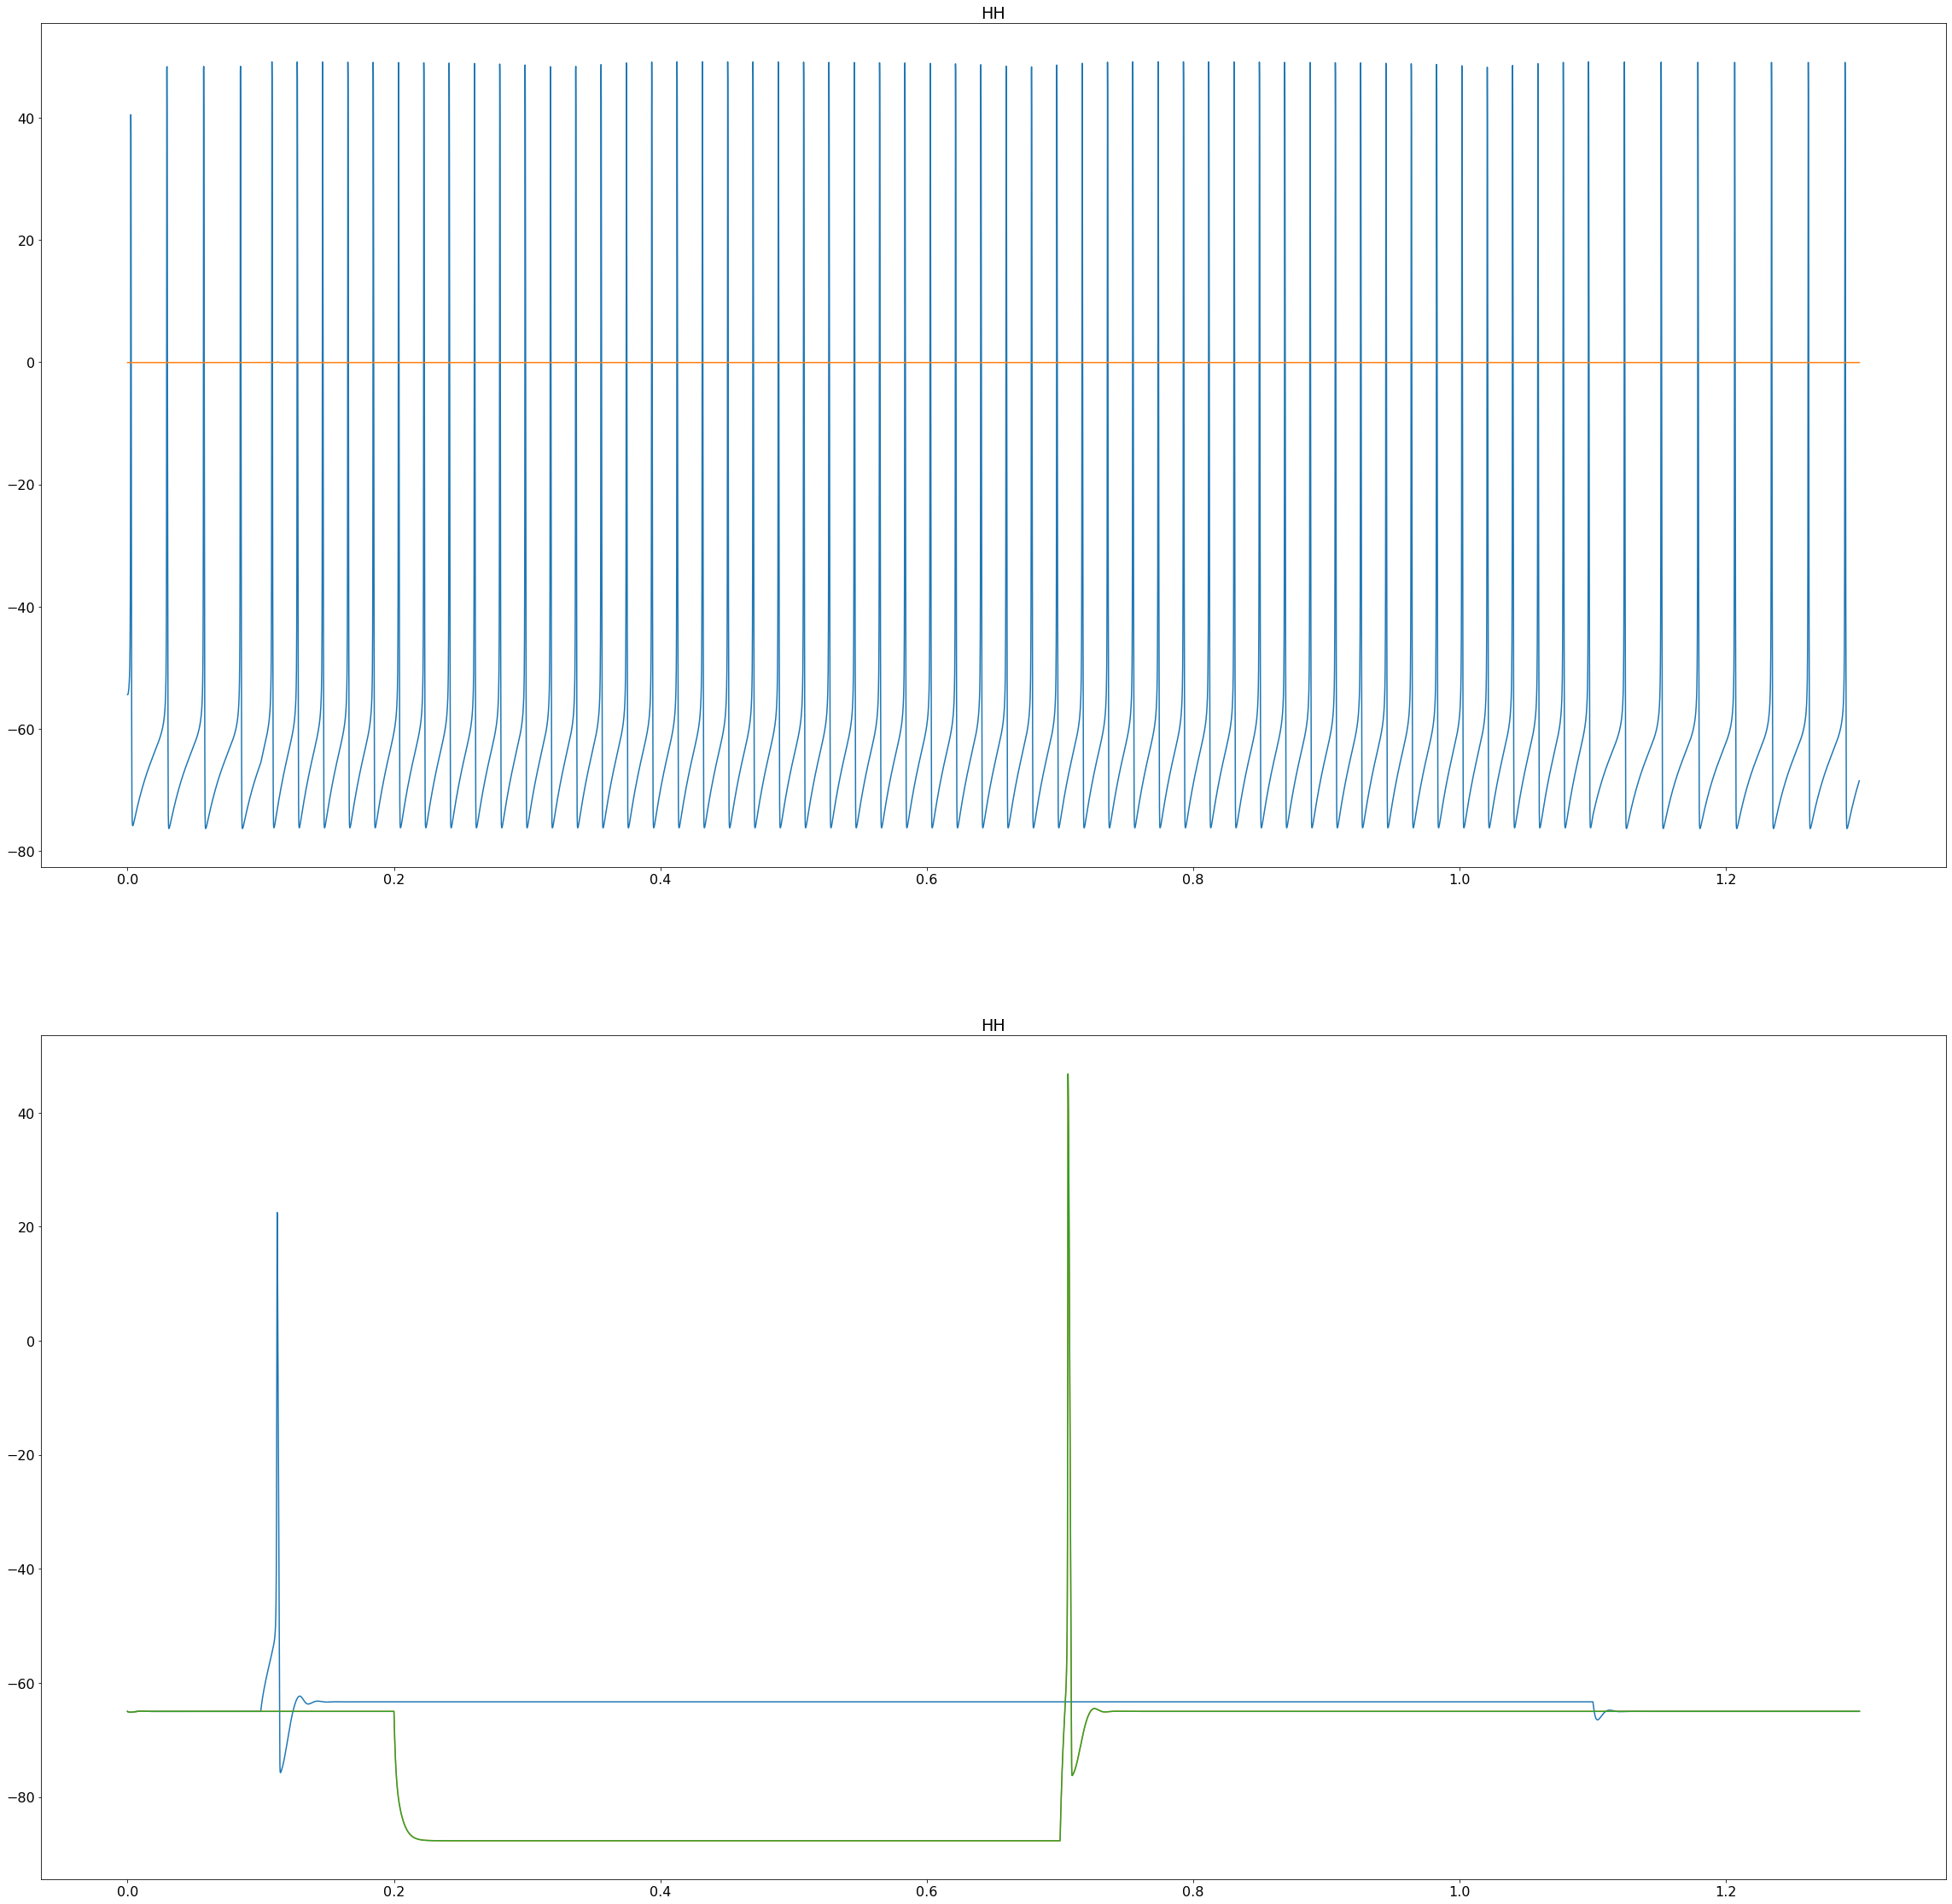

In [11]:
attrs = a.test_must_pass_0(copy.copy(vm_b),attrs_=new_attrs)

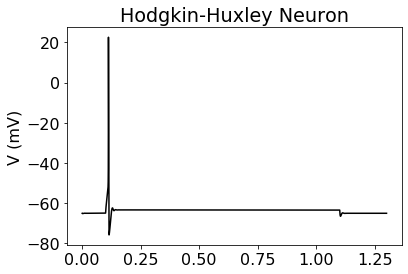

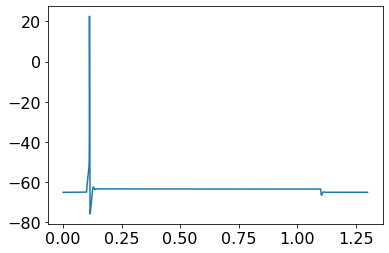

In [13]:

#dtc.rheobase

In [15]:
print(dtc.rheobase)


2.240341901779175 pA


In [16]:
#2.240341901779175 pA
